In [1]:
import fitz
import numpy as np
import pandas as pd
from tqdm import tqdm

import io
from PIL import Image, ImageDraw, ImageFont, ImageColor

### import fitz docs and dfs

In [2]:
vol1_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 1.pdf'
vol2_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 2.pdf'
vol3_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 3.pdf'

vol1_doc = fitz.open(vol1_path)
vol2_doc = fitz.open(vol2_path)
vol3_doc = fitz.open(vol3_path)

vol1_pages = [vol1_doc[i] for i in range(vol1_doc.page_count)]
vol2_pages = [vol2_doc[i] for i in range(vol2_doc.page_count)]
vol3_pages = [vol3_doc[i] for i in range(vol3_doc.page_count)]

In [3]:
vol1_char_df = pd.read_pickle("../input/char_df/vol1_df.pkl")
vol2_char_df = pd.read_pickle("../input/char_df/vol2_df.pkl")
vol3_char_df = pd.read_pickle("../input/char_df/vol3_df.pkl")

vol1_index = [616, 638] #inclusive
vol2_index = [703, 724]
vol3_index = [555, 582]

### Global Constants

In [4]:
TARGET_DPI = 300
mat = fitz.Matrix(TARGET_DPI/ 72, TARGET_DPI/ 72)

### Testing a page 
 looking at first word, of first span, having upper case character to

In [7]:
doc = vol1_doc
page_num = 582

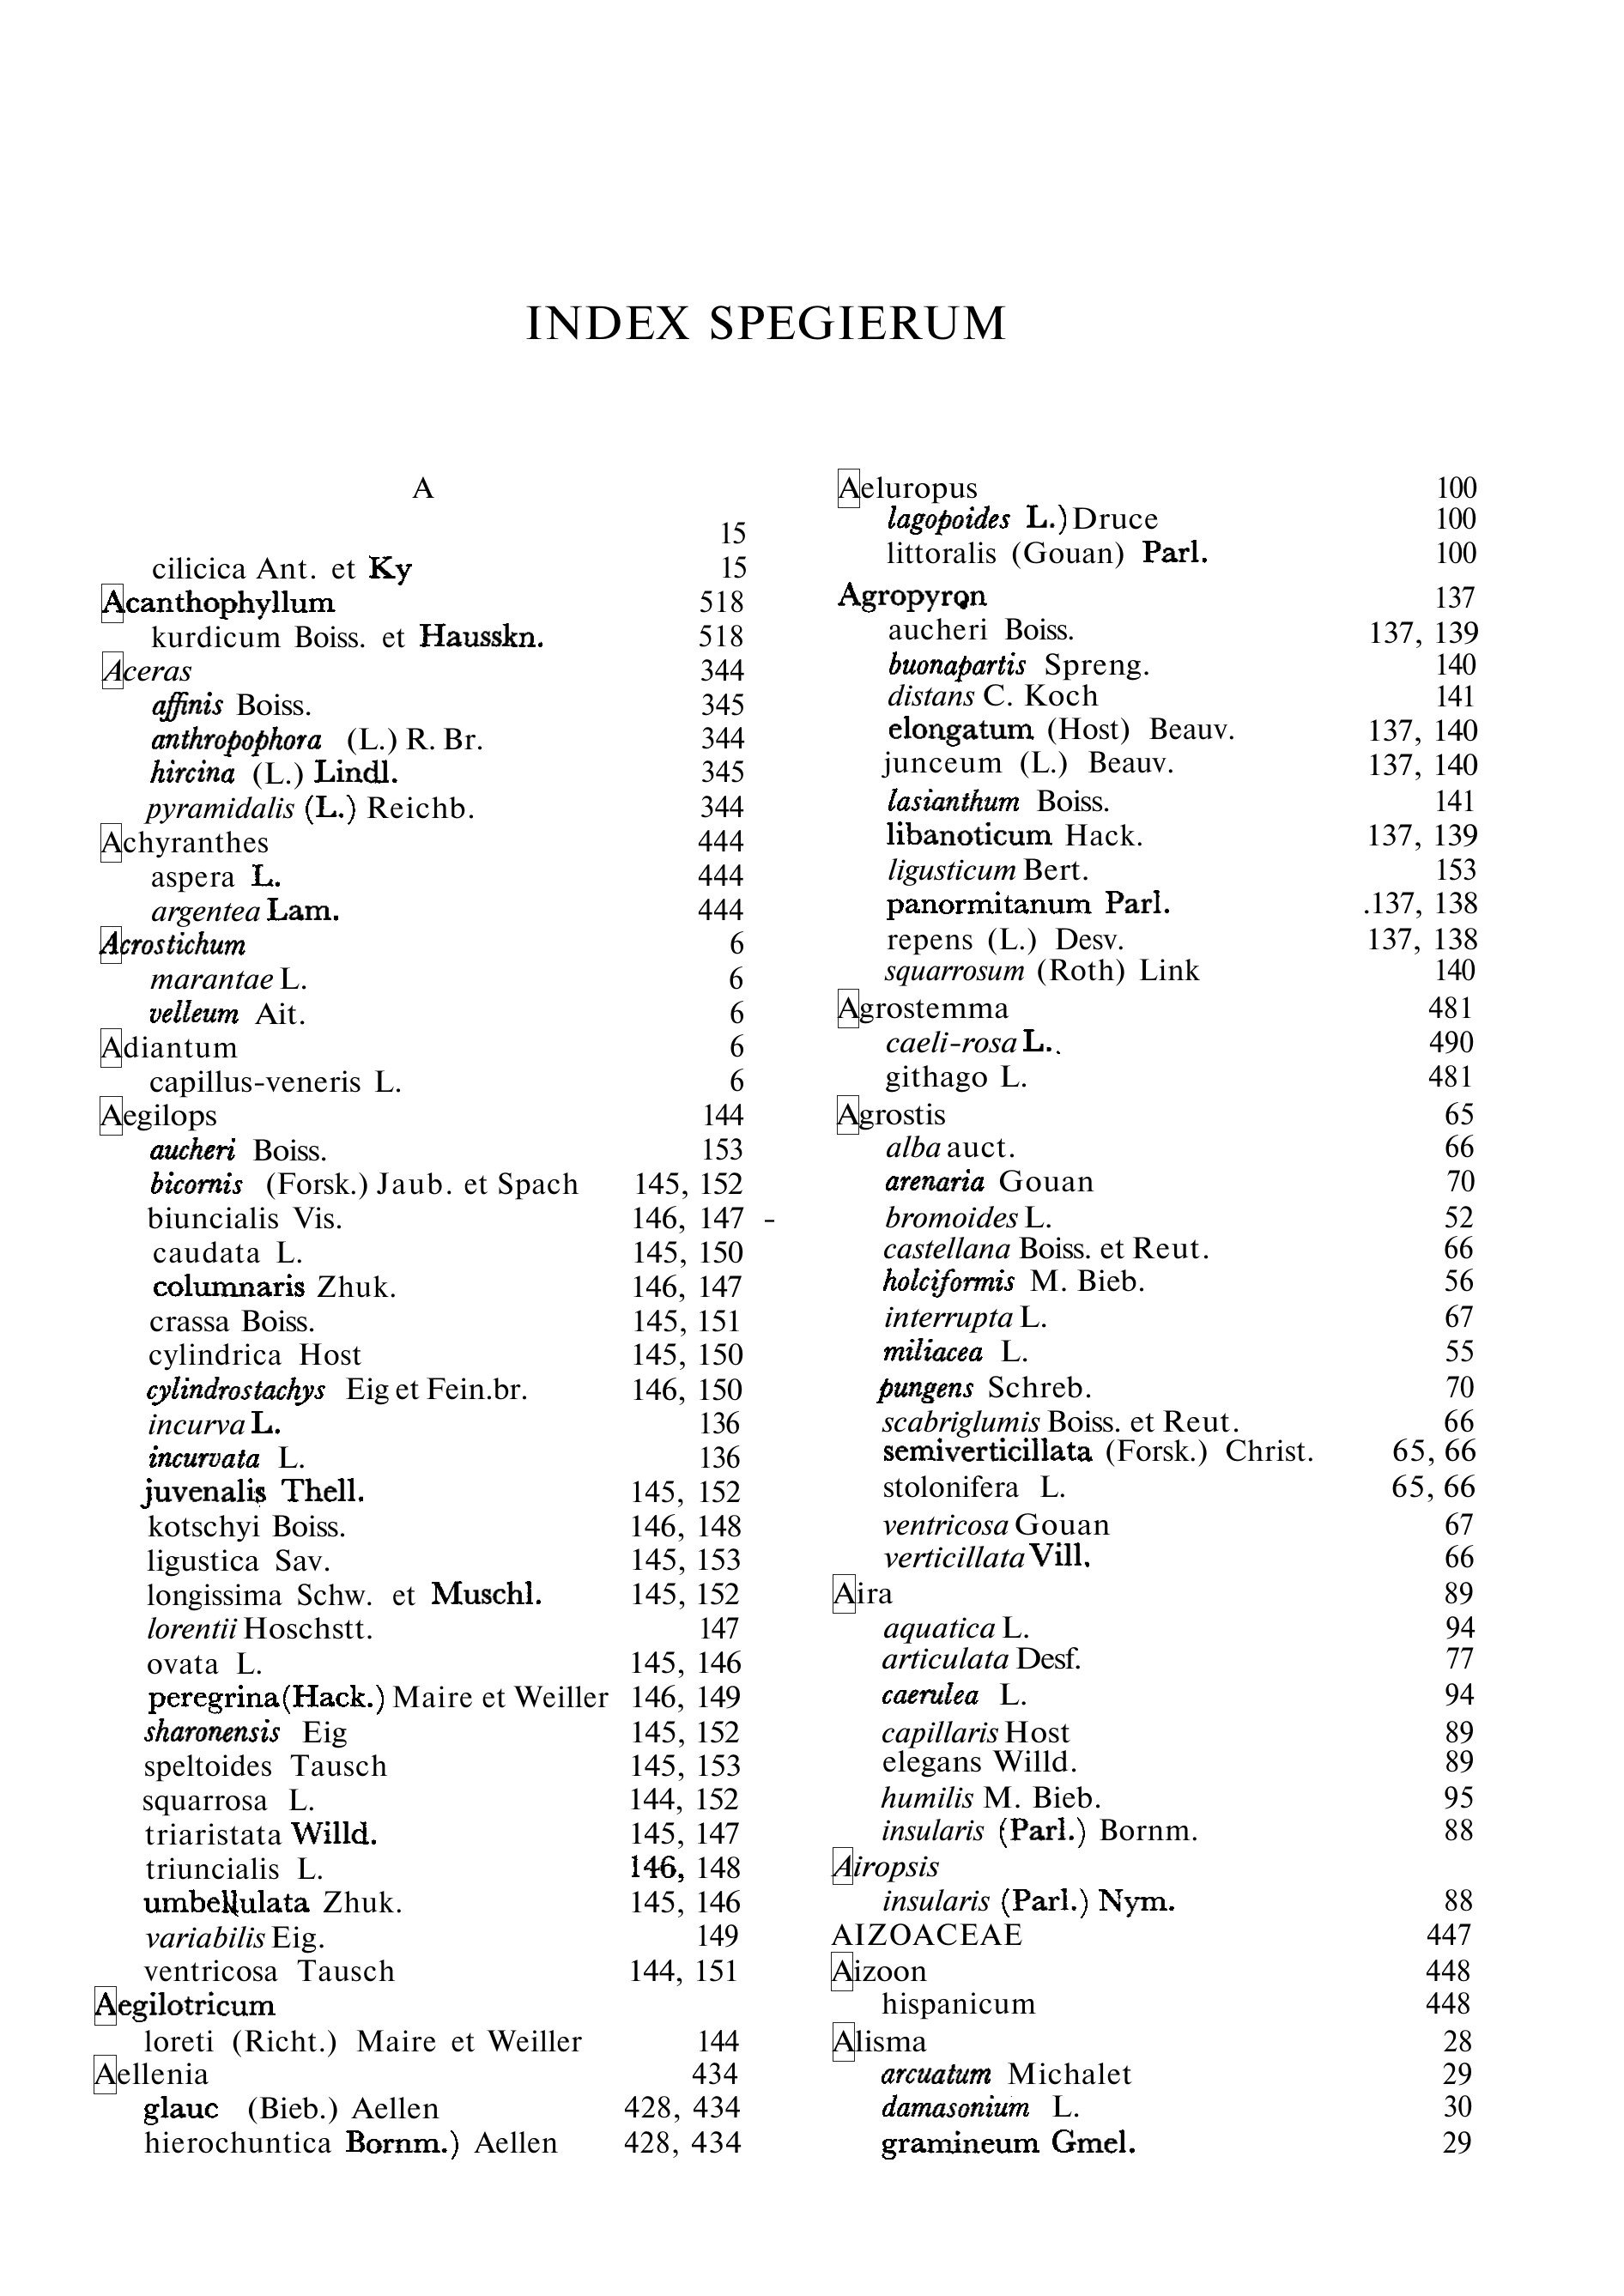

In [11]:
doc = vol1_doc
page_num = 616

pix_map = doc.get_page_pixmap(page_num,matrix=mat)
image = Image.open(io.BytesIO(pix_map.tobytes()))
draw = ImageDraw.Draw(image)

strict_match = vol1_char_df[(vol1_char_df['page_num'] == page_num) & 
                          (vol1_char_df['char'].apply(lambda x : x.isupper())) & 
                          (vol1_char_df['word'].apply(lambda s : len([c for c in s if c.isupper()]) == 1)) &
                          (vol1_char_df['word'].apply(lambda s : len(s) > 1)) &  
                          (vol1_char_df['word_num'] == 0) & 
                          (vol1_char_df['char_num'] == 0)]

# testing looking at first word, of first span, having upper case character to 
for coord in strict_match['char_bbox'] :
    x0, y0, x1, y1 = [f*TARGET_DPI/ 72 for f in coord]
    draw.rectangle((x0, y0, x1, y1), fill=None, outline=ImageColor.getrgb("#222222"))
image

In [21]:
vol1_char_df[(vol1_char_df['page_num'] == page_num)][['line_num', 'span_num',
       'span_size', 'span_flags', 'span_font', 'span_color',
       'span_bbox', 'word_num', 'word',
       'char_num', 'char', 'char_bbox']].head(50)

,line_num,span_num,span_size,span_flags,span_font,span_color,span_bbox,word_num,word,char_num,char,char_bbox
1715565,0,0,13.100000,4,Times-Roman,0,"(146.63999938964844, 82.23709106445312, 281.47...",0,INDEX,0,I,"(146.63999938964844, 82.23709106445312, 151.77..."
1715566,0,0,13.100000,4,Times-Roman,0,"(146.63999938964844, 82.23709106445312, 281.47...",0,INDEX,1,N,"(152.08697509765625, 82.23709106445312, 162.97..."
1715567,0,0,13.100000,4,Times-Roman,0,"(146.63999938964844, 82.23709106445312, 281.47...",0,INDEX,2,D,"(163.28485107421875, 82.23709106445312, 174.06..."
1715568,0,0,13.100000,4,Times-Roman,0,"(146.63999938964844, 82.23709106445312, 281.47...",0,INDEX,3,E,"(174.3779296875, 82.23709106445312, 183.102523..."
1715569,0,0,13.100000,4,Times-Roman,0,"(146.63999938964844, 82.23709106445312, 281.47...",0,INDEX,4,X,"(183.4152069091797, 82.23709106445312, 192.729..."
1715579,0,0,8.400000,4,Times-Roman,0,"(115.44000244140625, 131.1444091796875, 121.17...",0,A,0,A,"(115.44000244140625, 131.1444091796875, 121.17..."
1715580,0,0,8.549409,4,Times-Roman,0,"(42.47999954223633, 153.70440673828125, 99.590...",0,cilicica,0,c,"(42.47999954223633, 153.70440673828125, 46.578..."
1715581,0,0,8.549409,4,Times-Roman,0,"(42.47999954223633, 153.70440673828125, 99.590...",0,cilicica,1,i,"(46.631473541259766, 153.70440673828125, 49.05..."
1715582,0,0,8.549409,4,Times-Roman,0,"(42.47999954223633, 153.70440673828125, 99.590...",0,cilicica,2,l,"(49.10356140136719, 153.70440673828125, 51.461..."
1715583,0,0,8.549409,4,Times-Roman,0,"(42.47999954223633, 153.70440673828125, 99.590...",0,cilicica,3,i,"(51.514739990234375, 153.70440673828125, 53.93..."


In [82]:
values = list(strict_match.value_counts('char', sort=True))
indecies = strict_match.value_counts('char', sort=True).index.tolist()
index_val = list(zip(indecies, values))
index_val

[('C', 3), ('F', 3), ('S', 3), ('A', 2), ('L', 1), ('M', 1)]

## Untitled

In [44]:
strict_match

,vol_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_num,...,span_ascender,span_descender,span_origin,span_bbox,word_num,word,char_num,char,char_origin,char_bbox
1608149,3,580,33,56,"(24.479999542236328, 348.5630187988281, 205.82...",0,0,"(1.0, 0.0)","(24.479999542236328, 348.5630187988281, 87.274...",0,...,1.053,-0.281,"(24.479999542236328, 358.0400085449219)","(24.479999542236328, 348.5630187988281, 65.837...",0,Varthemia,0,V,"(24.479999542236328, 358.0400085449219)","(24.479999542236328, 348.5630187988281, 30.978..."
1608191,3,580,35,59,"(24.239999771118164, 370.64300537109375, 205.9...",0,0,"(1.0, 0.0)","(24.239999771118164, 370.64300537109375, 81.43...",0,...,1.053,-0.281,"(24.239999771118164, 380.1199951171875)","(24.239999771118164, 370.64300537109375, 81.43...",0,Verbascum,0,V,"(24.239999771118164, 380.1199951171875)","(24.239999771118164, 370.64300537109375, 30.67..."
1608208,3,580,36,61,"(33.36000061035156, 380.2430114746094, 205.360...",0,0,"(1.0, 0.0)","(33.36000061035156, 380.2430114746094, 205.360...",0,...,1.053,-0.281,"(33.36000061035156, 389.7200012207031)","(33.36000061035156, 380.2430114746094, 94.7359...",0,agMmoniifolium,2,M,"(41.83599853515625, 389.7200012207031)","(41.83599853515625, 380.2430114746094, 49.8369..."
1608442,3,580,44,75,"(33.36000061035156, 457.28302001953125, 205.70...",1,0,"(1.0, 0.0)","(33.36000061035156, 466.88299560546875, 57.808...",0,...,1.053,-0.281,"(33.36000061035156, 476.3599853515625)","(33.36000061035156, 466.88299560546875, 57.808...",0,Turra,0,T,"(33.36000061035156, 476.3599853515625)","(33.36000061035156, 466.88299560546875, 38.804..."
1609136,3,580,71,124,"(238.8000030517578, 260.9630126953125, 363.518...",0,0,"(1.0, 0.0)","(238.8000030517578, 260.9630126953125, 363.518...",0,...,1.053,-0.281,"(238.8000030517578, 270.44000244140625)","(238.8000030517578, 260.9630126953125, 335.544...",0,"Moretti,",0,M,"(238.8000030517578, 270.44000244140625)","(238.8000030517578, 260.9630126953125, 246.720..."
